In [7]:
from random import random
from random import randint
from random import choice
from numpy import array
from numpy import zeros
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from keras.optimizers import RMSprop


In [304]:
class Feature ( object ):
    def __init__ (self, size, feature_name):
        self.feature_name = feature_name
        self.model = Sequential()
        self.model.add(Conv2D(50, (5,5), activation='relu',
            input_shape=(size,size,1)))
        self.model.add(Conv2D(50, (5,5), activation='relu',
            input_shape=(size,size,1)))
        self.model.add(Conv2DTranspose(50, (5,5), activation='relu'))
        self.model.add(Conv2DTranspose(1, (5,5), activation='relu'))
        
#         self.model.add(Conv2D(200, (5,5), activation='relu',
#             input_shape=(size,size,1)))
#         self.model.add(Conv2DTranspose(1, (5,5), activation='relu'))

        opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)

        # RMSProp with lr == 0.001 and LSTM = 50 nodes seems pretty good
#         opt = RMSprop(lr=0.001, decay=0.05)
        self.model.compile(loss='mean_squared_error', optimizer = opt)
        print(self.model.summary())

c = Feature (12, feature_name = "inside")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 8, 8, 50)          1300      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 50)          62550     
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 8, 8, 50)          62550     
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 12, 12, 1)         1251      
Total params: 127,651
Trainable params: 127,651
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [21]:
from funs import shape

In [113]:
from importlib import reload
reload(shape)

<module 'funs.shape' from 'D:\\git\\learn-to-perform\\funs\\shape.py'>

In [205]:
frame, inside_frame = shape.generate_u_shape_inside (12, bottom_range = list(range(3,8)), 
                  left_range = list(range(1,8)), right_range = list(range(1,8)))

In [269]:
frame

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [270]:
inside_frame

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [235]:
def generate_examples(size, n_patterns):
    X, y = list(), list()
    while len(X) < n_patterns:
        frame, inside_frame = shape.generate_u_shape_inside (size, bottom_range = list(range(3,8)), 
                  left_range = list(range(1,8)), right_range = list(range(1,8)))
        
        X.append(frame)
        y.append(inside_frame)
    
    # resize as [samples, timesteps, width, height, channels]
    X = array(X).reshape(n_patterns, size, size, 1)
    y = array(y).reshape(n_patterns, size, size, 1)
    return X, y

In [263]:
X, y = generate_examples(12, 50000)

In [305]:
c.model.fit(X, y, batch_size=50, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 10s 197us/step - loss: 0.0106
Epoch 2/10
50000/50000 [==============================] - 9s 171us/step - loss: 0.0076
Epoch 3/10
50000/50000 [==============================] - 9s 171us/step - loss: 0.0070
Epoch 4/10
50000/50000 [==============================] - 8s 169us/step - loss: 0.0067
Epoch 5/10
50000/50000 [==============================] - 8s 163us/step - loss: 0.0064
Epoch 6/10
50000/50000 [==============================] - 8s 166us/step - loss: 0.0062
Epoch 7/10
50000/50000 [==============================] - 8s 165us/step - loss: 0.0061
Epoch 8/10
50000/50000 [==============================] - 8s 164us/step - loss: 0.0060
Epoch 9/10
50000/50000 [==============================] - 8s 163us/step - loss: 0.0059
Epoch 10/10
50000/50000 [==============================] - 8s 164us/step - loss: 0.0058


In [99]:
from funs import shape_plot

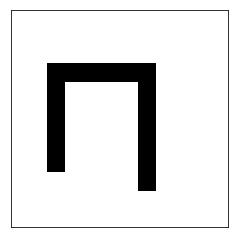

In [351]:
shape_plot.plot_frame ( X[2][:,:,0] )

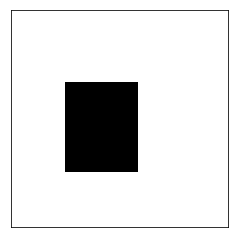

In [353]:
shape_plot.plot_frame ( y[2][:,:,0] )

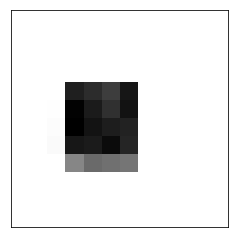

In [352]:
shape_plot.plot_frame ( c.model.predict(X[2:3])[0,:,:,0] )

In [119]:
X_jar, y_jar = shape.generate_jar_shape_inside(12)

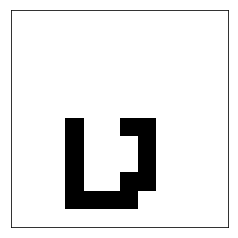

In [240]:
shape_plot.plot_frame ( X_jar )

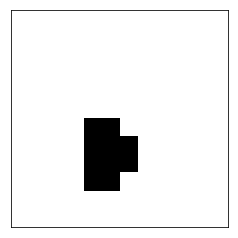

In [290]:
shape_plot.plot_frame ( y_jar )

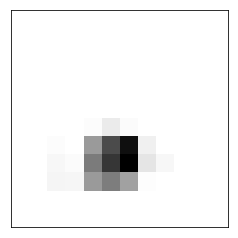

In [342]:
shape_plot.plot_frame (  c.model.predict( X_jar.reshape(1, 12, 12, 1) )[0,:,:,0] )

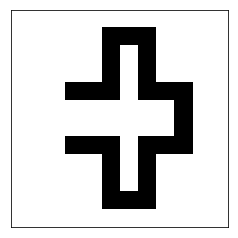

In [292]:
shape_plot.plot_frame(f)

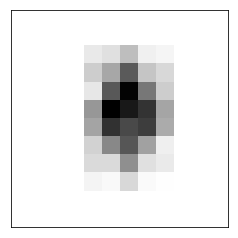

In [331]:
shape_plot.plot_frame (  c.model.predict( f.reshape(1, 12, 12, 1) )[0,:,:,0] )

In [347]:
def threshold( frame, threshold = 1) :
    frame[frame <= threshold] = 0
    frame[frame > threshold] = 1
    return frame

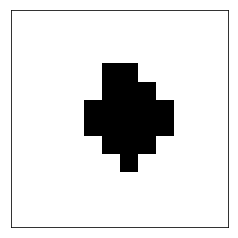

In [348]:
shape_plot.plot_frame ( threshold( c.model.predict( f.reshape(1, 12, 12, 1) )[0,:,:,0] ) )

In [354]:
f

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [366]:
f_2 = zeros((12, 12))
f_2[4, 3:9] = 1
f_2[7, 3:9] = 1

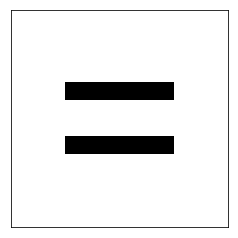

In [359]:
shape_plot.plot_frame(f_2)

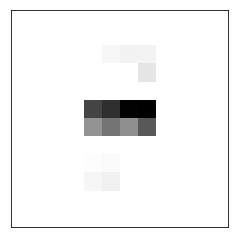

In [360]:
shape_plot.plot_frame (  c.model.predict( f_2.reshape(1, 12, 12, 1) )[0,:,:,0] )

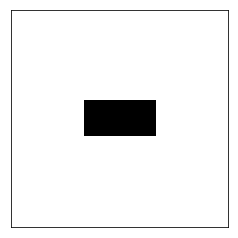

In [364]:
shape_plot.plot_frame ( threshold( c.model.predict( f_2.reshape(1, 12, 12, 1) )[0,:,:,0], threshold = 0.2  ) )

In [369]:
f_3 = zeros((12, 12))
f_3[4, 3:9] = 1
f_3[7, 3:6] = 1
f_3[7:10, 6] = 1
f_3[4:10, 8] = 1

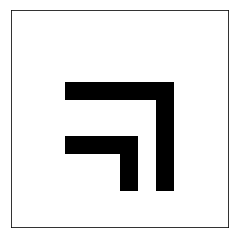

In [371]:
shape_plot.plot_frame(f_3)

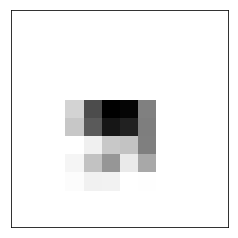

In [372]:
shape_plot.plot_frame (  c.model.predict( f_3.reshape(1, 12, 12, 1) )[0,:,:,0] )

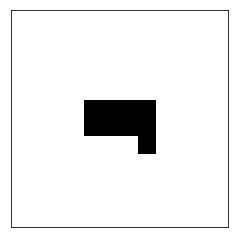

In [376]:
shape_plot.plot_frame ( threshold( c.model.predict( f_3.reshape(1, 12, 12, 1) )[0,:,:,0], threshold = 0.7  ) )